<a href="https://colab.research.google.com/github/sturu1/git-first/blob/master/Copy_of_sung_lec02_multilinear_regression(2)2020_06_11%EC%98%A4%ED%9B%84%EC%88%98%EC%97%853.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##파일을 불러서 Multiple Linear Regression 수행하기

> 본 예제에서는 아래 주소에 있는 csv파일을 불러들여서 multiple linear regression을 수행해 보겠습니다.  자료출처: https://github.com/hunkim/DeepLearningZeroToAll/tree/master/keras 

> 참고로, colab에서 여러분 컴퓨터에 있는 파일을 열기 위해서는 다음과 같이 할 수 있습니다. 
```
from google.colab import files
file = files.upload()
```

> 먼저 아래 주소에 있는 data-01-test-score.csv 파일을 여러분의 작업환경으로 가져 오겠습니다. 

In [1]:
!wget from https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/keras/data-01-test-score.csv import files
file = files.upload()

--2020-06-11 06:59:50--  http://from/
Resolving from (from)... failed: Name or service not known.
wget: unable to resolve host address ‘from’
--2020-06-11 06:59:50--  https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/keras/data-01-test-score.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 653 [text/plain]
Saving to: ‘data-01-test-score.csv’

data-01-test-score. 100%[===================>]     653  --.-KB/s    in 0s      

2020-06-11 06:59:51 (23.1 MB/s) - ‘data-01-test-score.csv’ saved [653/653]

--2020-06-11 06:59:51--  http://import/
Resolving import (import)... failed: Name or service not known.
wget: unable to resolve host address ‘import’
--2020-06-11 06:59:51--  http://files/
Resolving files (files)... failed: Name or service not know

NameError: ignored

> 현재 여러분의 디렉토리에 어떤 파일이 있는지 확인해 봅니다. 

In [2]:
!ls

data-01-test-score.csv	sample_data


> 이제 여러분들의 디렉토리에 있는 파일을 파이썬 작업환경에 불러오기 위하여 numpy 모듈에 있는 `loadtxt()`라는 함수를 사용하겠습니다. data-01-test-score.csv 파일을 불러와 xy라는 변수에 저장합니다. 

>`loadtxt()` 함수 내에 `delimiter=','`는 자료의 구분자로 ,를 사용한다는 의미입니다. 즉 대부분의 .csv 파을을 불러들일때 사용합니다. 

In [0]:
import numpy as np

In [0]:
xy = np.loadtxt("data-01-test-score.csv", delimiter=',', dtype=np.float32)

> `xy` 변수의 모양을 확인합니다. 25개의 학생(개체, 샘플)과 4개의 속성(출석, 중간, 기말, 최종성적)으로 이루어진 자료입니다. 

In [11]:
xy.shape

(25, 4)

> 다음으로 `xy`에 저장된 데이터를 입력변수와 출력변수로 분활합니다. 
단, 이때 xy 원본데이터와 마찬가지로 축을 2개로 유지해야 합니다. 그래서 출력데이터를 `xy[:,-1]`이 아닌 `xy[:,[-1]]`로 표현하였습니다. 위의 두 코드를 각각 실행해서 그 차이를 확인해 보시기 바랍니다. 

> 참고로 keras에서는 `xy[:,-1]` 해도 오류없이 학습이 진행됩니다. 그러나 명확한 이해를 위해서 `xy[:,[-1]]`로 표현하길 권고합니다. 

In [0]:
x_data = xy[:, :-1] #마지막 한열만 빼고

In [0]:
y_data = xy[:, [-1]] #마지막 한 열만 넣기

In [18]:
y_data

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]], dtype=float32)

> 다음으로 필요한 keras 모듀을 불러옵니다.

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

> 다음은, keras에 내표된 Sequential() 클래스를 사용하여 model instance를 생성합니다.

In [0]:
model = Sequential()

>  다음으로 model instance에 네트워크 구조를 만듭니다. 이 예제에서는 1개층, 1개의 unit으로 구성된 매우 단순한 신경망을 구성합니다. 
단, 이때, 입력데이터의 한 개체의 모양을 input_shape로 정의하는 것이 필요합니다. 입력데이터는 25개의 개체로 이루어져 있지만, 한 개체는 3개의 속성을 가지고 있으므로 inpu_shape는 1D 벡터인 (3,)로 지정합니다. 

In [0]:
model.add(Dense(units=1, input_shape=(3,)))

> **optimizer**(gradient descent) 알고리즘과 learning rate, **손실함수**를 정의하고 모델을 compile 합니다. 

In [0]:
model.compile(optimizer=RMSprop(lr=0.1), loss='mse')


> 모델을 100번에 걸쳐서 학습합니다. (epochs = 100)

In [31]:
history = model.fit(x_data, y_data, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 8ms/step - loss: 2488.3899
Epoch 2/100
25/25 [==============================] - 0s 106us/step - loss: 822.9441
Epoch 3/100
25/25 [==============================] - 0s 191us/step - loss: 189.7499
Epoch 4/100
25/25 [==============================] - 0s 50us/step - loss: 84.5830
Epoch 5/100
25/25 [==============================] - 0s 97us/step - loss: 64.4251
Epoch 6/100
25/25 [==============================] - 0s 94us/step - loss: 59.4089
Epoch 7/100
25/25 [==============================] - 0s 98us/step - loss: 57.7755
Epoch 8/100
25/25 [==============================] - 0s 105us/step - loss: 57.0863
Epoch 9/100
25/25 [==============================] - 0s 98us/step - loss: 56.7261
Epoch 10/100
25/25 [==============================] - 0s 129us/step - loss: 56.5227
Epoch 11/100
25/25 [==============================] - 0s 34us/step - loss: 56.4494
Epoch 12/100
25/25 [==============================] - 0s 36us/step - loss: 56.5784
Epoch 

In [0]:
import matplotlib.pyplot as plt

> 100번의 학습(epoch) 동안 손실함수 값의 변화를 그려보겠습니다. 

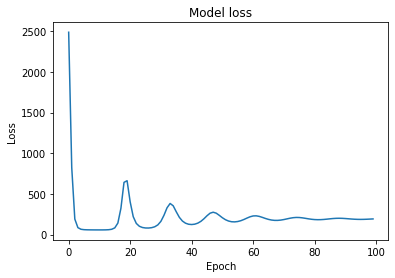

In [35]:
plt.plot(history.history["loss"])
plt.title("Model loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

> 모델의 학습이 끝났이느 새로운 데이터에 대한 예측을 수행해 봅니다. 

